Artificial Intelligence, Università di Firenze (2017/18)
=========================================================

---

Toy decision tree example
-----------------------


In [ ]:
import pandas as pd

txt_data = """
   * * *             *
 *    *      o  o  o  * *
             o o        *
  o  o    *         o  *
    o   * *     o
  *  *   *       o 
           * o o   *   *
    *         o      * *
"""
txt_data = [row for row in txt_data.strip().split('\n')]

data = []
for x2, row in enumerate(txt_data):
    for x1, ch in enumerate(row):
        if ch in ['o', '*']:
            data.append([x1, len(txt_data)-x2, 0 if ch=='*' else 1])
            
df = pd.DataFrame(data, columns=["x1", "x2", "y"])

In [8]:
df

,x1,x2,y
0,0,8,0
1,2,8,0
2,4,8,0
3,18,8,0
4,1,7,0
5,6,7,0
6,13,7,1
7,16,7,1
8,19,7,1
9,22,7,0


In [11]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree

def separation_surface(clf, df):
    plot_step = 0.1
    x_min, x_max = df.x1.min() - 1, df.x1.max() + 1
    y_min, y_max = df.x2.min() - 1, df.x2.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.viridis)
    plt.scatter(df.x1[df.y==0], df.x2[df.y==0],
               s=150, marker='o', c='w', cmap=plt.cm.viridis);
    plt.scatter(df.x1[df.y==1], df.x2[df.y==1],
               s=150, marker='*', c='k', cmap=plt.cm.viridis);
    plt.xlabel('x1')
    plt.ylabel('x2')

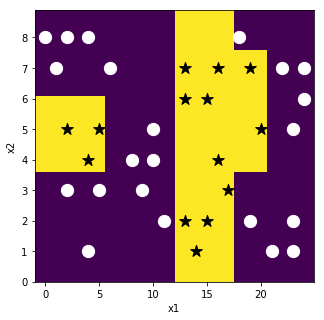

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(df[["x1", "x2"]], df.y)
separation_surface(clf, df)


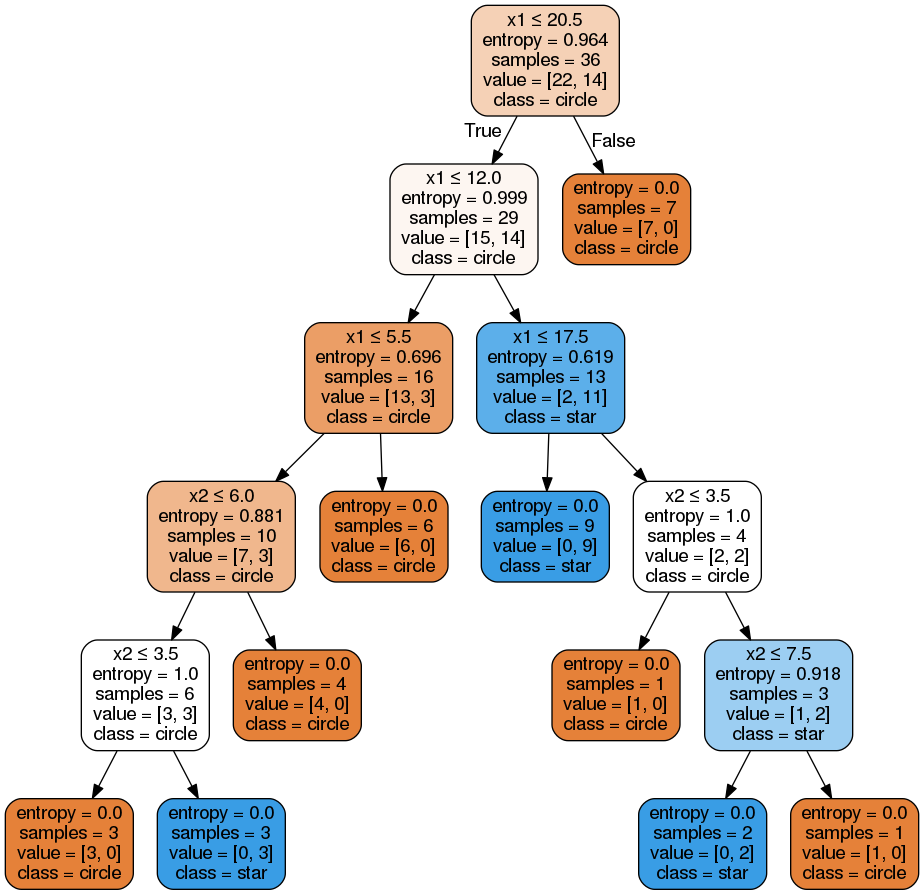

In [13]:
from io import StringIO
from IPython.display import Image
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                   feature_names=['x1', 'x2'],
                   class_names=['circle','star'],
                   filled=True, rounded=True,
                   special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())